$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{\,\middle\vert\,}
\newcommand{\DKL}[2]{\cset{D}_{\text{KL}}\left(#1\,\Vert\, #2\right)}
\newcommand{\grad}[]{\nabla}
$$

# Part 3: Mini-Project
<a id=part3></a>

In this part you'll implement a small comparative-analysis project, heavily based on the materials from the tutorials and homework.

You must **choose one** of the project options specified below.

### Guidelines

- You should implement the code which displays your results in this notebook, and add any additional code files for your implementation in the `project/` directory. You can import these files here, as we do for the homeworks.
- Running this notebook should not perform any training - load your results from some output files and display them here. The notebook must be runnable from start to end without errors.
- You must include a detailed write-up (in the notebook) of what you implemented and how. 
- Explain the structure of your code and how to run it to reproduce your results.
- Explicitly state any external code you used, including built-in pytorch models and code from the course tutorials/homework.
- Analyze your numerical results, explaining **why** you got these results (not just specifying the results).
- Where relevant, place all results in a table or display them using a graph.
- Before submitting, make sure all files which are required to run this notebook are included in the generated submission zip.
- Try to keep the submission file size under 10MB. Do not include model checkpoint files, dataset files, or any other non-essentials files. Instead include your results as images/text files/pickles/etc, and load them for display in this notebook. 

## Sentiment Analysis with Self-Attention and Word Embeddings

Based on Tutorials 6 and 7, we'll implement and train an improved sentiment analysis model.
We'll use self-attention instead of RNNs and incorporate pre-trained word embeddings.

In tutorial 6 we saw that we can train word embeddings together with the model.
Although this produces embeddings which are customized to the specific task at hand,
it also greatly increases training time.
A common technique is to use pre-trained word embeddings.
This is essentially a large mapping from words (e.g. in english) to some
high-dimensional vector, such that semantically similar words have an embedding that is
"close" by some metric (e.g. cosine distance).
Use the [GloVe](https://nlp.stanford.edu/projects/glove/) 6B embeddings for this purpose.
You can load these vectors into the weights of an `nn.Embedding` layer.

In tutorial 7 we learned how attention can be used to learn to predict a relative importance
for each element in a sequence, compared to the other elements.
Here, we'll replace the RNN with self-attention only approach similar to Transformer models, roughly based on [this paper](https://www.aclweb.org/anthology/W18-6219.pdf).
After embedding each word in the sentence using the pre-trained word-embedding a positional-encoding vector is added to provide each word in the sentence a unique value based on it's location.
One or more self-attention layers are then applied to the results, to obtain an importance weighting for each word.
Then we classify the sentence based on the average these weighted encodings.


Now, using these approaches, you need to:

- Implement a **baseline** model: Use pre-trained embeddings with an RNN-based model.
You can use LSTM/GRU or bi-directional versions of these, in a way very similar to what we implemented in the tutorial.
-  Implement an **improved** model: Based on the self-attention approach, implement an attention-based sentiment analysis model that has 1-2 self-attention layers instead of an RNN. You should use the same pre-trained word embeddings for this model.
- You can use pytorch's built-in RNNs, attention layers, etc.
- For positional encoding you can use the sinosoidal approach described in the paper (first proposed [here](https://arxiv.org/pdf/1706.03762.pdf)). You can use existing online implementations (even though it's straightforward to implement). 
- You can use the SST database as shown in the tutorial.

Your results should include:
- Everything written in the **Guidelines** above.
- A comparative analysis: compare the baseline to the improved model. Compare in terms of overall classification accuracy and show a multiclass confusion matrix.
- Visualize of the attention maps for a few movie reviews from each class, and explain the results.

## Spectrally-Normalized Wasserstein GANs

In HW3 we implemented a simple GANs from scratch, using an approach very similar to the original GAN paper. However, the results left much to be desired and we discovered first-hand how hard it is to train GANs due to their inherent instability.

One of the prevailing approaches for improving training stability for GANs is to use a technique called [Spectral Normalization](https://arxiv.org/pdf/1802.05957.pdf) to normalize the largest singular value of a weight matrix so that it equals 1.
This approach is generally applied to the discriminator's weights in order to stabilize training. The resulting model is sometimes referred to as a SN-GAN.
See Appendix A in the linked paper for the exact algorithm. You can also use pytorch's `spectral_norm`.

Another very common improvement to the vanilla GAN is known a [Wasserstein GAN](https://arxiv.org/pdf/1701.07875.pdf) (WGAN). It uses a simple modification to the loss function, with strong theoretical justifications based on the Wasserstein (earth-mover's) distance.
See also [here](https://developers.google.com/machine-learning/gan/loss) for a brief explanation of this loss function.

One problem with generative models for images is that it's difficult to objectively assess the quality of the resulting images.
To also obtain a quantitative score for the images generated by each model,
we'll use the [Inception Score](https://arxiv.org/pdf/1606.03498.pdf).
This uses a pre-trained Inception CNN model on the generated images and computes a score based on the predicted probability for each class.
Although not a perfect proxy for subjective quality, it's commonly used a way to compare generative models.
You can use an implementation of this score that you find online, e.g. [this one](https://github.com/sbarratt/inception-score-pytorch) or implement it yourself.

Based on the linked papers, add Spectral Normalization and the Wassertein loss to your GAN from HW3.
Compare between:
- The baseline model (vanilla GAN)
- SN-GAN (vanilla + Spectral Normalization)
- WGAN (using Wasserstein Loss)
- Optional: SN+WGAN, i.e. a combined model using both modifications.

As a dataset, you can use [LFW](http://vis-www.cs.umass.edu/lfw/) as in HW3 or [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html), or even choose a custom dataset (note that there's a dataloder for CelebA in `torchvision`). 

Your results should include:
- Everything written in the **Guidelines** above.
- A comparative analysis between the baseline and the other models. Compare:
  - Subjective quality (show multiple generated images from each model)
  - Inception score (can use a subset of the data).
- You should show substantially improved subjective visual results with these techniques.

## Implementation

**TODO**: This is where you should write your explanations and implement the code to display the results.
See guidelines about what to include in this section.

In [1]:
# import labbrys
import unittest
import os
import sys
import pathlib
import urllib
import shutil
import re
import zipfile

import numpy as np
import torch
import matplotlib.pyplot as plt

import cs236781.plot as plot
import cs236781.download

In [2]:
"""create file for the checkpoint and images, we will save the resoult there"""

if not os.path.exists('checkpoints'):
    os.makedirs('checkpoints')
if not os.path.exists('project_imgs'):
    os.makedirs('project_imgs')

In [3]:
"""load the data """

import torchvision.transforms as T
from torchvision.datasets import ImageFolder

#load device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUSTOM_DATA_URL = None
DATA_DIR = pathlib.Path.home().joinpath('.pytorch-datasets')
if CUSTOM_DATA_URL is None:
    DATA_URL = 'http://vis-www.cs.umass.edu/lfw/lfw-bush.zip'
else:
    DATA_URL = CUSTOM_DATA_URL

# download data
_, dataset_dir = cs236781.download.download_data(out_path=DATA_DIR, url=DATA_URL, extract=True, force=False)


im_size = 64
tf = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize((im_size, im_size)),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])

ds_gwb = ImageFolder(os.path.dirname(dataset_dir), tf)
print("we working on device: ", device)
print("\n##################################")

File /home/topaz.aharon/.pytorch-datasets/lfw-bush.zip exists, skipping download.
Extracting /home/topaz.aharon/.pytorch-datasets/lfw-bush.zip...
Extracted 531 to /home/topaz.aharon/.pytorch-datasets/lfw/George_W_Bush
we working on device:  cuda

##################################


In [4]:
# from project.train_gan_model import train_gan_model
# from  project.answers import *

from project.train_gan_model import *
from project.score_inception import inception_score
from project.plot_graphs import *

In [5]:
import project.vanilla_gan as v_gan
v_gen = train_gan_model(device, ds_gwb, v_gan, 'v_gan', v_gan_hyperparams())

##inception score
# mean , scores = inception_score(v_gen, cuda=True, batch_size=32, resize=False, splits=1)
# print(f'$$$$$$$$$$$$$$$ scores are {scores} and mean score is{mean}.')

<class 'torch.device'>
{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.2, 'discriminator_optimizer': {'type': 'SGD', 'lr': 0.0075}, 'generator_optimizer': {'type': 'Adam', 'lr': 0.001, 'betas': (0.5, 0.999)}}
<module 'project.vanilla_gan' from '/home/topaz.aharon/DL/hw4/project/vanilla_gan.py'>
 EPOCH 1/20 
100%|██████████| 17/17 [00:03<00:00,  4.38it/s]
discriminator loss - 15.746649293338551
generator loss     - 15.722717047945567


/home/topaz.aharon/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torch/nn/functional.py:3118: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/home/topaz.aharon/DL/hw4/project/score_inception.py:45: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


 EPOCH 2/20 
100%|██████████| 17/17 [00:03<00:00,  4.72it/s]
discriminator loss - 8.423429071903229
generator loss     - 19.60286089252023
 EPOCH 3/20 
100%|██████████| 17/17 [00:03<00:00,  4.70it/s]
discriminator loss - 10.002741636598811
generator loss     - 17.97044431084
 EPOCH 4/20 
100%|██████████| 17/17 [00:03<00:00,  4.74it/s]
discriminator loss - 13.695784232195686
generator loss     - 20.87998889617088
 EPOCH 5/20 
100%|██████████| 17/17 [00:03<00:00,  4.75it/s]
discriminator loss - 17.02905901740579
generator loss     - 13.185693573238336
 EPOCH 6/20 
100%|██████████| 17/17 [00:03<00:00,  4.73it/s]
discriminator loss - 19.697325482087976
generator loss     - 10.895045141822363
 EPOCH 7/20 
100%|██████████| 17/17 [00:03<00:00,  4.78it/s]
discriminator loss - 20.601757105659036
generator loss     - 11.210318849982631
 EPOCH 8/20 
100%|██████████| 17/17 [00:03<00:00,  4.66it/s]
discriminator loss - 20.835140059976016
generator loss     - 11.760495354147519
 EPOCH 9/20 
100%|███

*** Images Generated from best model:


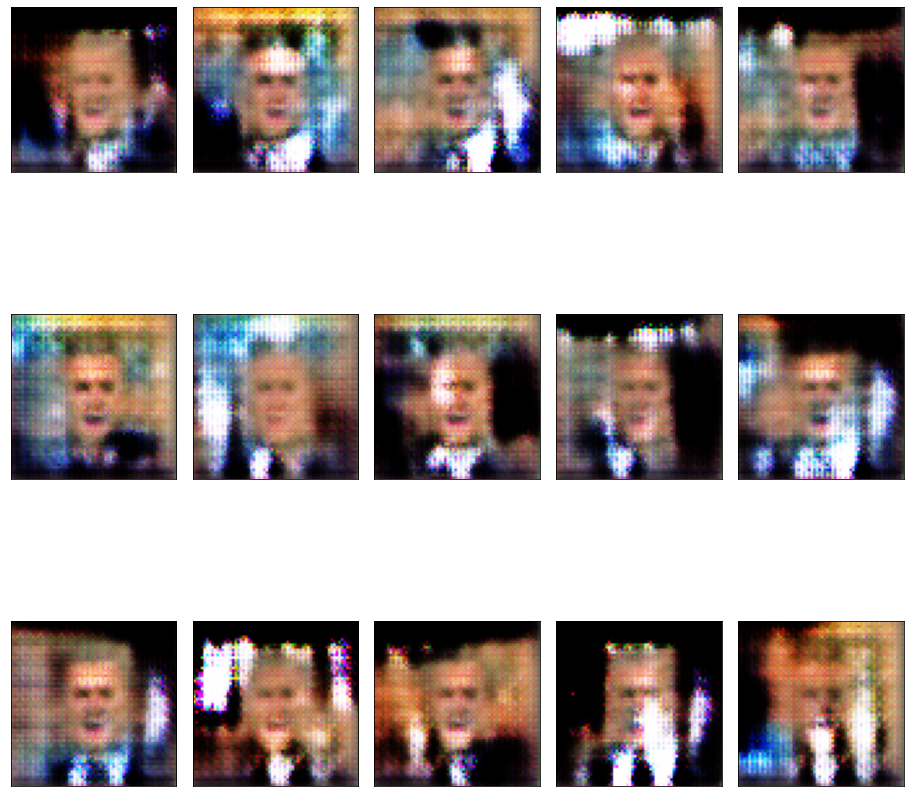

In [6]:
# Plot images from best or last model
checkpoint_file = 'checkpoints/v_gan'
if os.path.isfile(f'{checkpoint_file}.pt'):
    gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
print('*** Images Generated from best model:')
samples = gen.sample(n=15, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(16,16))

first_file lines: [15.746649293338551, 8.423429071903229, 10.002741636598811, 13.695784232195686, 17.02905901740579, 19.697325482087976, 20.601757105659036, 20.835140059976016, 20.828086292042453, 21.133957582361557, 19.98492639205035, 18.147615657133215, 19.054475784301758, 21.209242035360898, 19.253194640664493, 19.817780214197494, 19.411289102890912, 19.086077746223, 17.76026675280403, 17.786275162416345]
second_file lines: [15.722717047945567, 19.60286089252023, 17.97044431084, 20.87998889617088, 13.185693573238336, 10.895045141822363, 11.210318849982631, 11.760495354147519, 11.478498684351935, 11.90315785193268, 12.333889398894094, 14.57690202930296, 14.479641139330193, 12.074074135764555, 12.683073272599893, 15.02213259326181, 13.248772810925445, 15.52138344264198, 14.445119776875776, 15.310483904677817]


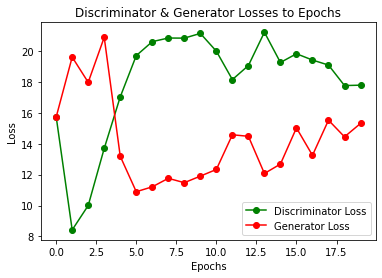

In [7]:
# plotting discriminator loss and generator loss
path = "project/outputs_for_graphs/"
first_filename = "discriminator_v_gan.txt"
second_filename = "generator_v_gan.txt"
graph_title = "Discriminator & Generator Losses to Epochs"
x_title = "Epochs"
y_title = "Loss"
plot_graph(path+first_filename, path+second_filename, graph_title, x_title, y_title)

first_file lines: [1.0465259819166144, 1.935163817981073, 1.5669239183379247, 2.2443550901503926, 2.104988184263945, 1.844341342569454, 1.9118860640155582, 2.0411400627502316, 1.898760577130614, 1.7245091838087145, 1.7888642071144054, 1.8802622005182295, 1.6221752240733396, 1.7928761199449834, 1.8558776272509225, 2.1225168825186875, 1.9826545996728655, 2.124633696156279, 1.9338945437194959, 2.1712333949672016]


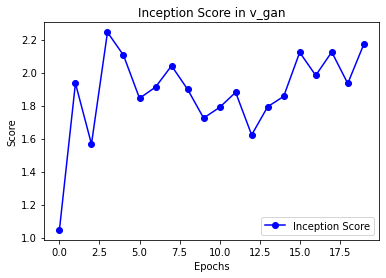

In [8]:
# plotting inception score per epoch
path = "project/outputs_for_graphs/"
first_filename = "inception_v_gan.txt"
graph_title = "Inception Score in v_gan"
x_title = "Epochs"
y_title = "Score"
plot_inception_graph(path+first_filename, graph_title, x_title, y_title)

In [9]:
import project.spectral_norm_gan as sn_gan
sn_gen = train_gan_model(device, ds_gwb, sn_gan,'sn_gan',sn_gan_hyperparams())
print(sn_gen)

<class 'torch.device'>
{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.2, 'discriminator_optimizer': {'type': 'SGD', 'lr': 0.0075}, 'generator_optimizer': {'type': 'Adam', 'lr': 0.001, 'betas': (0.5, 0.999)}}
<module 'project.spectral_norm_gan' from '/home/topaz.aharon/DL/hw4/project/spectral_norm_gan.py'>
 EPOCH 1/20 
100%|██████████| 17/17 [00:03<00:00,  4.55it/s]
discriminator loss - 1.2880208071540384
generator loss     - 0.9391987008206985
 EPOCH 2/20 
100%|██████████| 17/17 [00:03<00:00,  4.58it/s]
discriminator loss - 1.2626480425105375
generator loss     - 0.883386864381678
 EPOCH 3/20 
100%|██████████| 17/17 [00:03<00:00,  4.59it/s]
discriminator loss - 1.0408684681443607
generator loss     - 1.063300420256222
 EPOCH 4/20 
100%|██████████| 17/17 [00:03<00:00,  4.58it/s]
discriminator loss - 1.3964134524850285
generator loss     - 0.8573108455714058
 EPOCH 5/20 
100%|██████████| 17/17 [00:03<00:00,  4.59it/s]
discriminator loss - 1.357070382903604
generator l

*** Images Generated from best model:


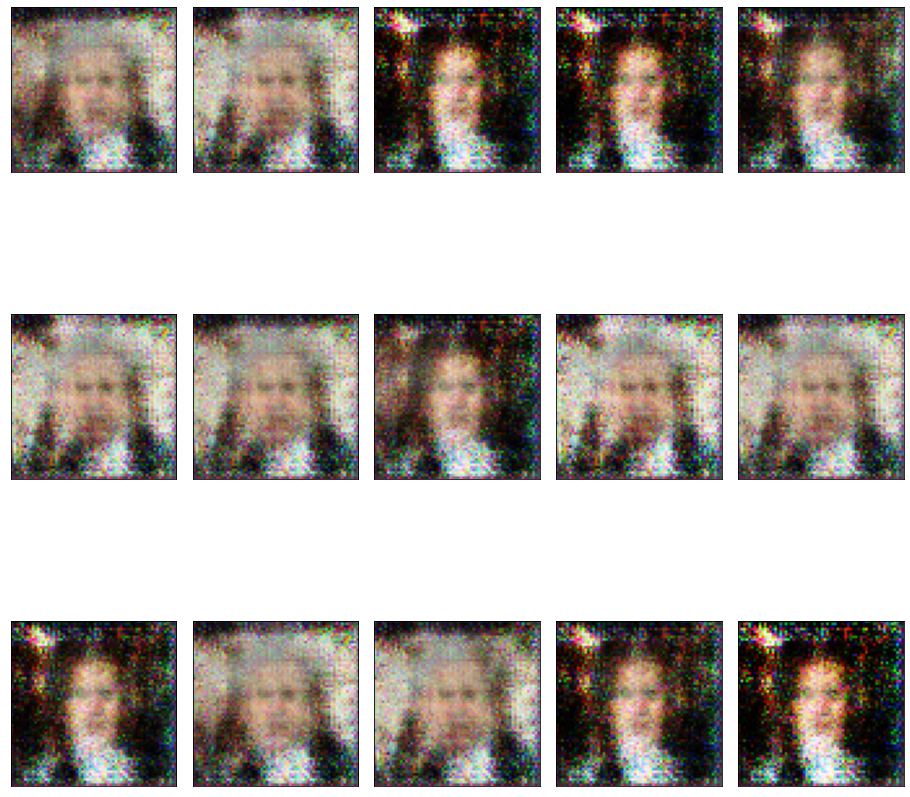

In [10]:
# Plot images from best or last model
checkpoint_file = 'checkpoints/sn_gan'
if os.path.isfile(f'{checkpoint_file}.pt'):
    gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
print('*** Images Generated from best model:')
samples = gen.sample(n=15, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(16,16))

first_file lines: [1.2880208071540384, 1.2626480425105375, 1.0408684681443607, 1.3964134524850285, 1.357070382903604, 1.4702440430136288, 1.4665002121644861, 1.4519703458337223, 1.438976848826689, 1.4285229935365564, 1.4216270026038675, 1.4166859598720776, 1.4150515233769136, 1.411827045328477, 1.4074878902996288, 1.405648105284747, 1.4062911131802727, 1.4035129617242252, 1.4024427498088163, 1.3998726255753462]
second_file lines: [0.9391987008206985, 0.883386864381678, 1.063300420256222, 0.8573108455714058, 0.6831078494296354, 0.6694642726112815, 0.6890721250982845, 0.6886311734423918, 0.6816953034961925, 0.684206625994514, 0.6859076303594253, 0.6887089645161348, 0.6894162682925954, 0.6874665933496812, 0.6876083261826459, 0.6852518565514508, 0.6845090599621043, 0.6885925706695107, 0.6856593559770023, 0.686381483779234]


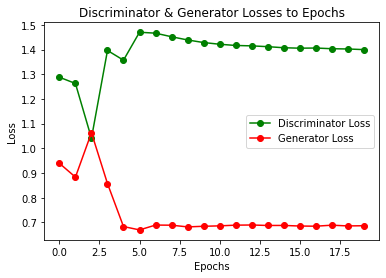

In [11]:
# plotting discriminator loss and generator loss
path = "project/outputs_for_graphs/"
first_filename = "discriminator_sn_gan.txt"
second_filename = "generator_sn_gan.txt"
graph_title = "Discriminator & Generator Losses to Epochs"
x_title = "Epochs"
y_title = "Loss"
plot_graph(path+first_filename, path+second_filename, graph_title, x_title, y_title)

first_file lines: [1.6627795115605282, 1.7002010032476913, 1.848904097926096, 1.8402796821468725, 1.9142446068870036, 2.3455493260052425, 1.601006935228892, 1.721595354886775, 1.4827812287106745, 1.5270503481036568, 1.8563567874452764, 1.6331154819463636, 1.6196041599149238, 1.7304951603278789, 1.7078350727112688, 1.716183705315203, 1.6139867458206356, 1.6467734256660695, 1.524712101783202, 1.5245163151560783]


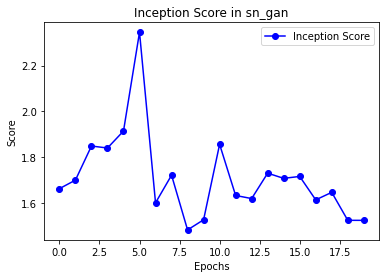

In [12]:
# plotting inception score per epoch
path = "project/outputs_for_graphs/"
first_filename = "inception_sn_gan.txt"
graph_title = "Inception Score in sn_gan"
x_title = "Epochs"
y_title = "Score"
plot_inception_graph(path+first_filename, graph_title, x_title, y_title)

In [13]:
import project.wass_gan as w_gan
w_gen = train_gan_model(device, ds_gwb, w_gan,'w_gan',w_gan_hyperparams())

<class 'torch.device'>
{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.0002, 'discriminator_optimizer': {'type': 'RMSprop', 'lr': 3.5e-05}, 'generator_optimizer': {'type': 'RMSprop', 'lr': 0.0001}, 'N': 5}
<module 'project.wass_gan' from '/home/topaz.aharon/DL/hw4/project/wass_gan.py'>
 EPOCH 1/20 
100%|██████████| 17/17 [00:08<00:00,  1.96it/s]
discriminator loss - -0.21086787037989674
generator loss     - -0.27303146877709555
 EPOCH 2/20 
100%|██████████| 17/17 [00:08<00:00,  1.95it/s]
discriminator loss - -0.41490547797259164
generator loss     - -0.4456169920809129
 EPOCH 3/20 
100%|██████████| 17/17 [00:08<00:00,  1.97it/s]
discriminator loss - -0.5055495325256797
generator loss     - -0.12006136725711472
 EPOCH 4/20 
100%|██████████| 17/17 [00:08<00:00,  1.97it/s]
discriminator loss - -0.5432562915717855
generator loss     - 0.12660242025466525
 EPOCH 5/20 
100%|██████████| 17/17 [00:08<00:00,  1.95it/s]
discriminator loss - -0.6355471050038057
generator loss  

*** Images Generated from best model:


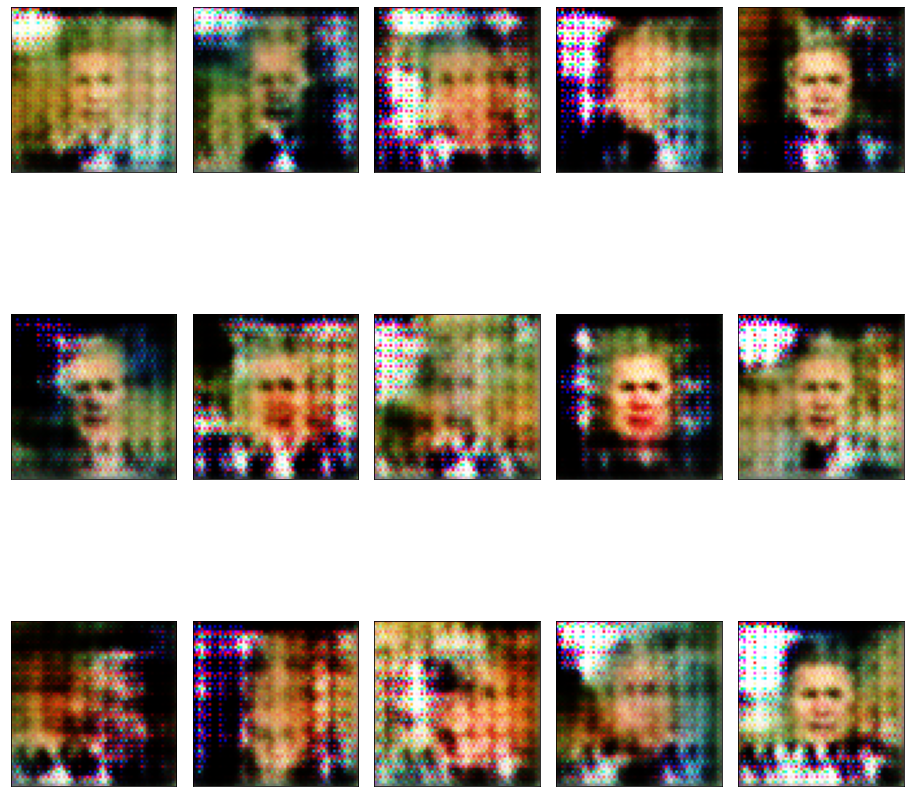

In [14]:
# Plotting images from best or last model
checkpoint_file = 'checkpoints/w_gan'
if os.path.isfile(f'{checkpoint_file}.pt'):
    gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
print('*** Images Generated from best model:')
samples = gen.sample(n=15, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(16,16))

first_file lines: [-0.21086787037989674, -0.41490547797259164, -0.5055495325256797, -0.5432562915717855, -0.6355471050038057, -0.6900845520636615, -0.6077833158128402, -0.6746955058153938, -0.7036741253207711, -0.6447465822977179, -0.7424040541929358, -0.7646942699656767, -0.7041732844184426, -0.6810051728697384, -0.6758711881497327, -0.6879130286328933, -0.7067027688026428, -0.7351096237407011, -0.7787271702990812, -0.7832357357530033]
second_file lines: [-0.27303146877709555, -0.4456169920809129, -0.12006136725711472, 0.12660242025466525, 0.22647266615839565, 0.30397072259117575, 0.2900204040548381, 0.30761970404316397, 0.330166089184144, 0.31435055855442495, 0.34015165357028737, 0.3480222277781543, 0.3173147755510667, 0.3253810160300311, 0.2851420132552876, 0.318898865405251, 0.3261667490005493, 0.3129744976758957, 0.3508111939710729, 0.3529347689712749]


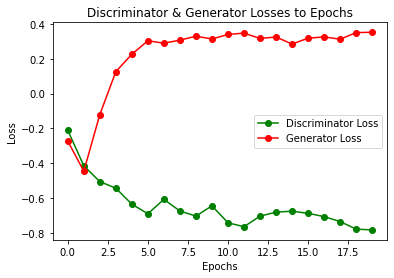

In [15]:
# plotting discriminator loss and generator loss
path = "project/outputs_for_graphs/"
first_filename = "discriminator_w_gan.txt"
second_filename = "generator_w_gan.txt"
graph_title = "Discriminator & Generator Losses to Epochs"
x_title = "Epochs"
y_title = "Loss"
plot_graph(path+first_filename, path+second_filename, graph_title, x_title, y_title)

first_file lines: [1.8390633182734188, 1.9654909628999302, 2.120297683673167, 1.9811345317287248, 2.0053582310545583, 2.106199486929489, 2.053893653973439, 2.1537931599376963, 2.021951576680798, 2.1294181192035966, 2.1606324100259533, 1.999423972787564, 2.2307623684090165, 2.143780174580728, 2.013270225351995, 2.13602524584714, 1.9950304874335723, 2.1290596919606046, 2.1468683060330216, 2.172060500981869]


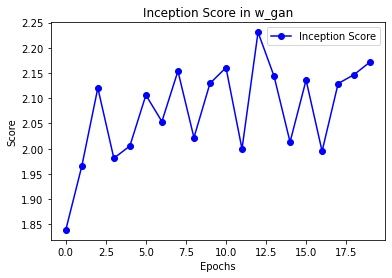

In [16]:
# plotting inception score per epoch
path = "project/outputs_for_graphs/"
first_filename = "inception_w_gan.txt"
graph_title = "Inception Score in w_gan"
x_title = "Epochs"
y_title = "Score"
plot_inception_graph(path+first_filename, graph_title, x_title, y_title)

In [5]:
import project.spectral_norm_wass_gan as sn_w_gan
sn_plus_w_gen = train_gan_model(device, ds_gwb, sn_w_gan,'sn_w_gan',w_gan_hyperparams())

<class 'torch.device'>
{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.0002, 'discriminator_optimizer': {'type': 'RMSprop', 'lr': 3.5e-05}, 'generator_optimizer': {'type': 'RMSprop', 'lr': 0.0001}, 'N': 5}
<module 'project.spectral_norm_wass_gan' from '/home/topaz.aharon/DL/hw4/project/spectral_norm_wass_gan.py'>
 EPOCH 1/20 
100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
discriminator loss - -320.78715694651885
generator loss     - 260.38631125057447


/home/topaz.aharon/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torch/nn/functional.py:3118: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/home/topaz.aharon/DL/hw4/project/score_inception.py:45: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


 EPOCH 2/20 
100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
discriminator loss - -138.3215399349437
generator loss     - 56.86712124768425
 EPOCH 3/20 
100%|██████████| 17/17 [00:08<00:00,  1.93it/s]
discriminator loss - -106.8618033914005
generator loss     - 41.020803563735065
 EPOCH 4/20 
100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
discriminator loss - -114.25996219410615
generator loss     - 98.57054241965798
 EPOCH 5/20 
100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
discriminator loss - -129.645372727338
generator loss     - 50.91816561362322
333
Saved checkpoint - 5/20
 EPOCH 6/20 
100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
discriminator loss - -105.16092367733226
generator loss     - 45.81311834559721
 EPOCH 7/20 
100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
discriminator loss - -111.35328629437615
generator loss     - 29.450328756781186
 EPOCH 8/20 
100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
discriminator loss - -94.58086642097024
generator loss     - 34.859

*** Images Generated from best model:


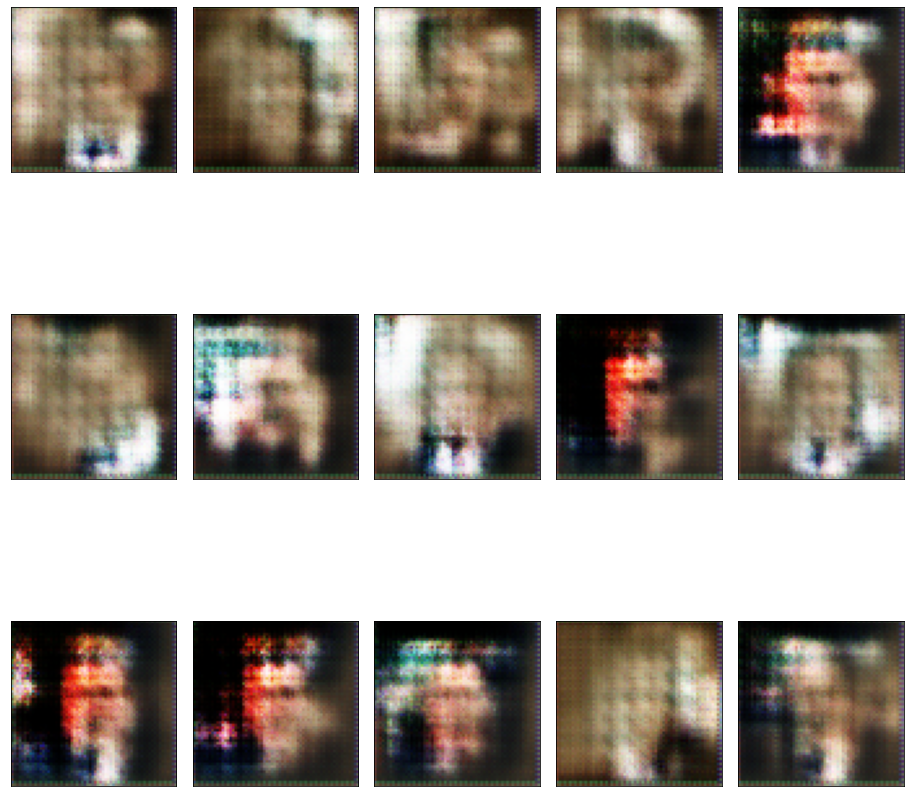

In [6]:
# Plotting images from best or last model
checkpoint_file = 'checkpoints/sn_w_gan'
if os.path.isfile(f'{checkpoint_file}.pt'):
    gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
print('*** Images Generated from best model:')
samples = gen.sample(n=15, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(16,16))

first_file lines: [-320.78715694651885, -138.3215399349437, -106.8618033914005, -114.25996219410615, -129.645372727338, -105.16092367733226, -111.35328629437615, -94.58086642097024, -90.46806896434111, -85.61397754444795, -88.92680112053367, -94.88816530564252, -90.40379299837001, -83.51196782729205, -85.97321543974034, -85.5792163400089, -86.48019678452435, -82.87027897554286, -86.73396907133214, -92.34949358771829]
second_file lines: [260.38631125057447, 56.86712124768425, 41.020803563735065, 98.57054241965798, 50.91816561362322, 45.81311834559721, 29.450328756781186, 34.85925281749052, 39.74887354233686, 8.776964636409984, 50.638236354379096, 44.55140385908239, 32.36962719524608, 21.923878838034238, 24.249025597291833, 31.07287342408124, 25.08780527114868, 30.449768515194165, 39.73418314316694, 4.4457049089319565]


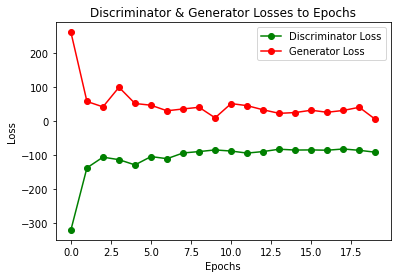

In [7]:
# plotting discriminator loss and generator loss
path = "project/outputs_for_graphs/"
first_filename = "discriminator_sn_w_gan.txt"
second_filename = "generator_sn_w_gan.txt"
graph_title = "Discriminator & Generator Losses to Epochs"
x_title = "Epochs"
y_title = "Loss"
plot_graph(path+first_filename, path+second_filename, graph_title, x_title, y_title)

first_file lines: [1.7531005055621403, 1.6893026265798996, 1.2740414130196496, 2.0554509098435423, 2.1585119933482106, 2.020183266750461, 1.568000364708669, 1.6645490474278228, 1.7696837314261884, 1.8606692968926768, 1.7727981266173383, 1.6503535283021447, 1.6622355165274931, 1.707559626507184, 1.643129096069399, 1.6493730228572587, 1.6278873869106327, 1.6422650001253216, 1.7103735503948798, 1.7727343916845035]


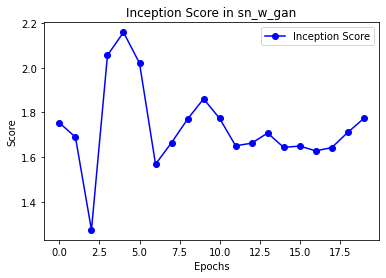

In [8]:
# plotting inception score per epoch
path = "project/outputs_for_graphs/"
first_filename = "inception_sn_w_gan.txt"
graph_title = "Inception Score in sn_w_gan"
x_title = "Epochs"
y_title = "Score"
plot_inception_graph(path+first_filename, graph_title, x_title, y_title)

first_file lines: [1.0465259819166144, 1.935163817981073, 1.5669239183379247, 2.2443550901503926, 2.104988184263945, 1.844341342569454, 1.9118860640155582, 2.0411400627502316, 1.898760577130614, 1.7245091838087145, 1.7888642071144054, 1.8802622005182295, 1.6221752240733396, 1.7928761199449834, 1.8558776272509225, 2.1225168825186875, 1.9826545996728655, 2.124633696156279, 1.9338945437194959, 2.1712333949672016]
second_file lines: [1.6627795115605282, 1.7002010032476913, 1.848904097926096, 1.8402796821468725, 1.9142446068870036, 2.3455493260052425, 1.601006935228892, 1.721595354886775, 1.4827812287106745, 1.5270503481036568, 1.8563567874452764, 1.6331154819463636, 1.6196041599149238, 1.7304951603278789, 1.7078350727112688, 1.716183705315203, 1.6139867458206356, 1.6467734256660695, 1.524712101783202, 1.5245163151560783]
second_file lines: [1.8390633182734188, 1.9654909628999302, 2.120297683673167, 1.9811345317287248, 2.0053582310545583, 2.106199486929489, 2.053893653973439, 2.153793159937

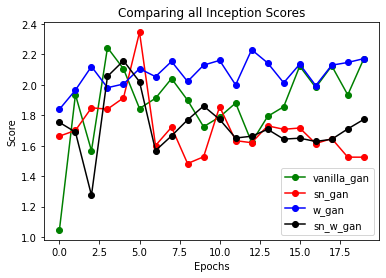

In [9]:
# plotting a graph comparing all inception scores
path = "project/outputs_for_graphs/"
first_filename =  "inception_v_gan.txt"
second_filename =  "inception_sn_gan.txt"
third_filename =  "inception_w_gan.txt"
forth_filename =  "inception_sn_w_gan.txt"
graph_title = "Comparing all Inception Scores"
x_title = "Epochs"
y_title = "Score"
plot_all_inceptions_graph(path+first_filename, path+second_filename, path+third_filename, path+forth_filename, graph_title, x_title, y_title)